['26-20.csv', '2600.csv', '2610.csv', '2620.csv', '2630.csv', '2640.csv', '2650.csv', '2660.csv', '2670.csv', '2680.csv', '2690.csv', '269100.csv', '269110.csv']


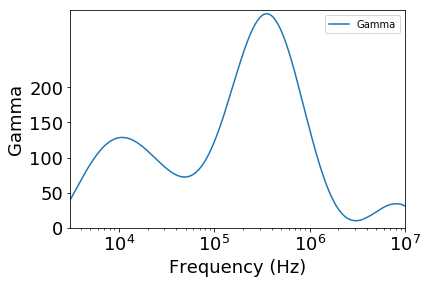

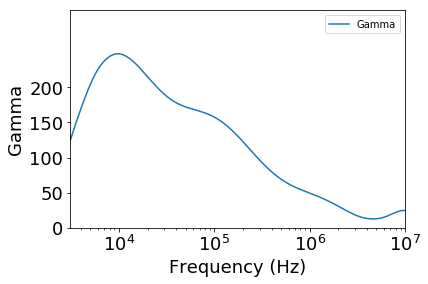

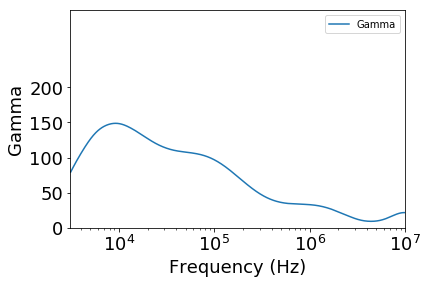

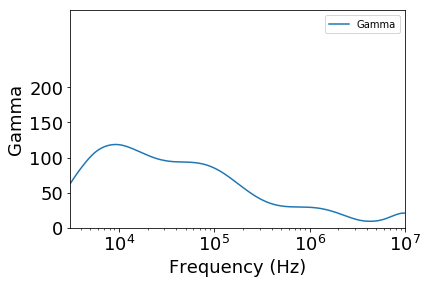

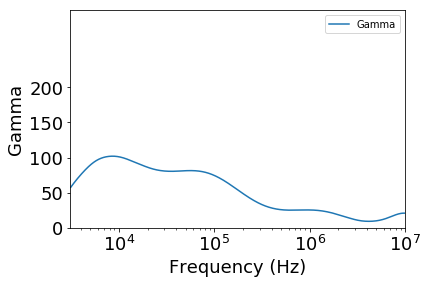

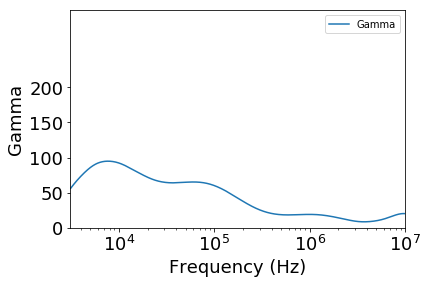

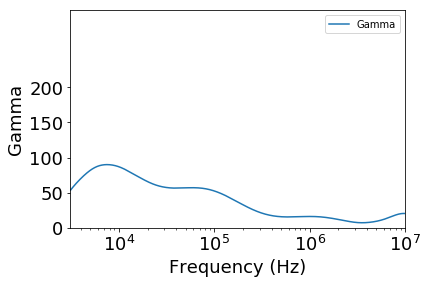

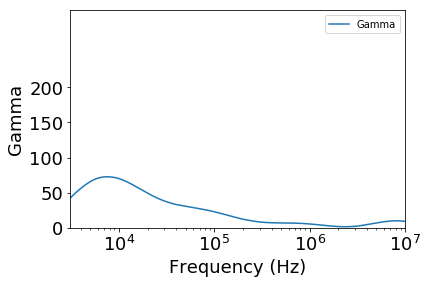

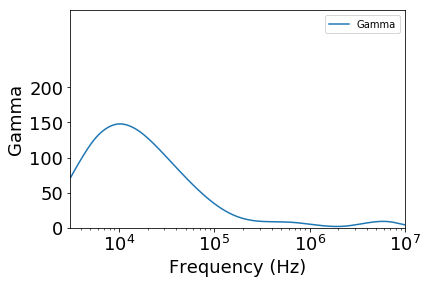

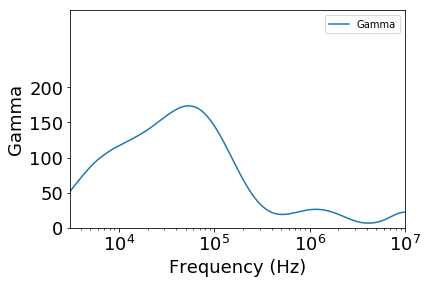

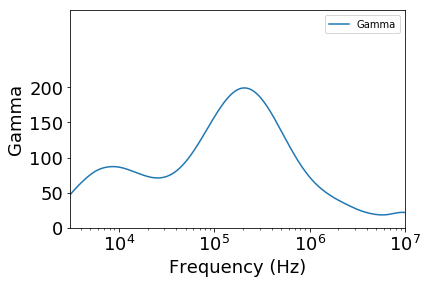

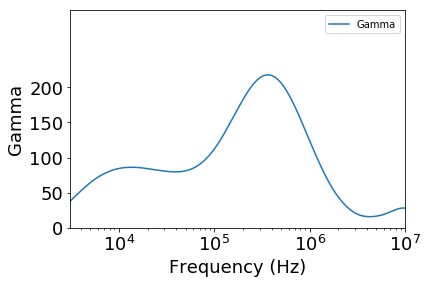

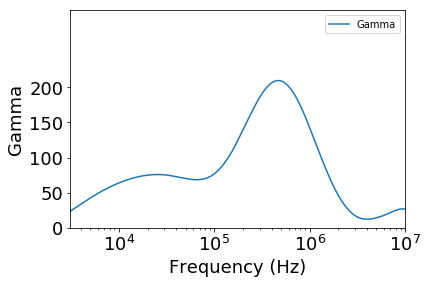

In [1]:
#_*_coding:utf-8_*_
# author: fukun
# 2019.4.4
'''（0）频率： 读取一个文件夹所有文件。按频率挨个画出DRT图。DRT计算条件，Gaussian,1E-3,2nd-order,shape factor=1.77
'''
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline
fl = 3.1e3
fh = 1e7
taul = 1/fh
tauh = 1/fl

filepath='D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\26 60ns'
filenames = os.listdir(filepath)         # 读取全部文件名
print(filenames)
#plt.figure()
for filename in filenames:
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    drt['Frequency (Hz)']= drt['tau'].map(lambda x: 1/x)
    drt.plot(x='Frequency (Hz)',y='Gamma',logx=True, xlim=[fl, fh], ylim=[0,310],fontsize=18, yticks=[0,50,100,150,200]) #, title=filename
    plt.ylabel('Gamma',fontsize=18)
    plt.xlabel('Frequency (Hz)',fontsize=18)


#plt.xlabel('tau')
plt.show()   

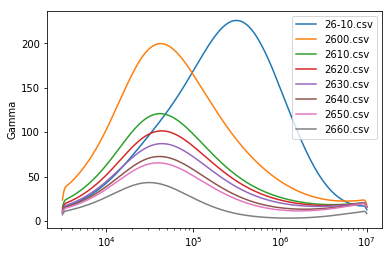

In [5]:
#_*_coding:utf-8_*_
# author: fukun
# 2019.4.4
'''（1）频率：读取一个文件夹所有文件。按频率将DRT画在一张图上
'''
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline
fl = 3.1e3
fh = 1e7
taul = 1/fh
tauh = 1/fl

filepath='D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2019\\26 60ns'
filenames = os.listdir(filepath)         # 读取全部文件名

#plt.figure()
for filename in filenames:
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    drt['Frequency (Hz)']= drt['tau'].map(lambda x: 1/x)
    drt = drt.values
    plt.semilogx(drt[:,2],drt[:,0],label=filename)
    plt.legend()
    plt.ylabel('Gamma')


#plt.xlabel('tau')
plt.show()   

                Frequency      Gamma
Conditions                          
Pre         352530.374898  304.98020
1 min         9741.917131  247.98580
3 min         9275.826917  148.81460
5 min         9275.826917  118.62670
10 min        8576.027773  101.96530
20 min        7699.177728   94.84467
30 min        7549.665474   89.93853
60 min        7549.665474   72.59261


Text(0.5, 0, ' ')

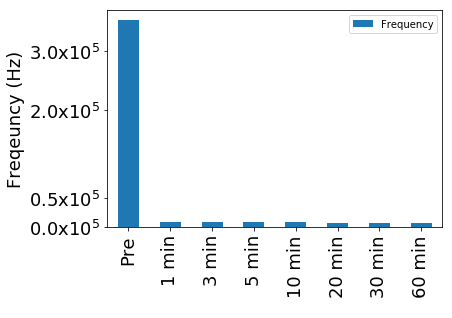

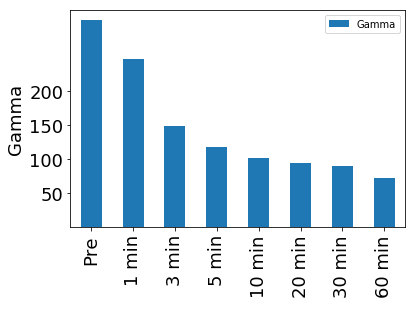

In [7]:
#_*_coding:utf-8_*_
# author: fukun
# 2019.4.4
'''（2）频率：读取一个文件夹所有文件。找出DRT极值及其对应频率
'''
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline
fl = 3.1e3
fh = 1e7
taul = 1/fh
tauh = 1/fl

filepath='D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\26 60ns'
filenames = os.listdir(filepath)         # 读取全部文件名
I = len(filenames)
Max_Gamma = np.zeros(2*I).reshape(-1,2)
#plt.figure()
for i in range(I):
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    filename = filenames[i]
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    drt['Frequency (Hz)']= drt['tau'].map(lambda x: 1/x)
    drt = drt.set_index('Frequency (Hz)')
    Max_value = drt.max(axis=0)['Gamma'] # 寻找最大值，axis=0表示列
    Max_index = drt['Gamma'].idxmax()    # 寻找最大值对应的index
    Max_Gamma[i,0] = Max_index
    Max_Gamma[i,1] = Max_value
    

D = pd.DataFrame(Max_Gamma,columns=['Frequency','Gamma'])
D['Conditions']=['Pre','1 min','3 min','5 min','10 min','20 min','30 min','60 min']
D = D.set_index('Conditions')
print(D)
ax = D.plot(y='Frequency',kind='bar', fontsize=18, yticks=[0,5e4,2e5,3e5])
plt.ylabel('Freqeuncy (Hz)',fontsize=18)
plt.xlabel(' ')
def formatnum(x, pos):
    return '$%.1f$x$10^{5}$' % (x/100000) # 科学记数法
formatter = FuncFormatter(formatnum)
ax.yaxis.set_major_formatter(formatter)   # Y轴 科学记数法

D.plot(y='Gamma',kind='bar',fontsize=18, yticks=[50,100,150,200])
plt.ylabel('Gamma',fontsize=18)
plt.xlabel(' ')


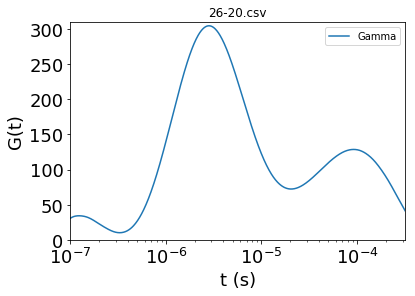

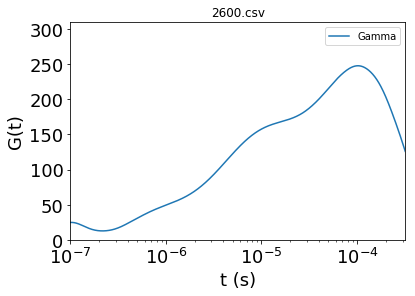

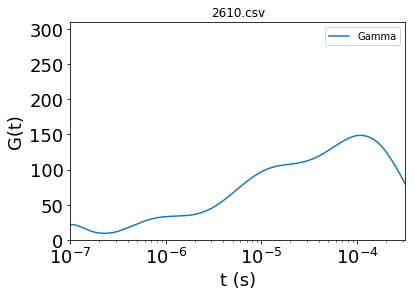

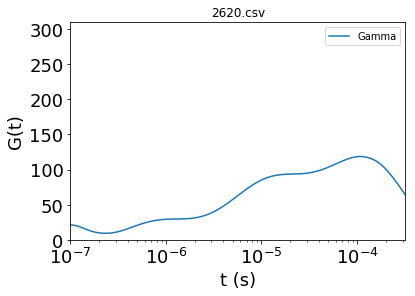

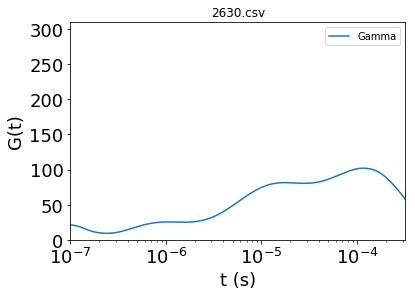

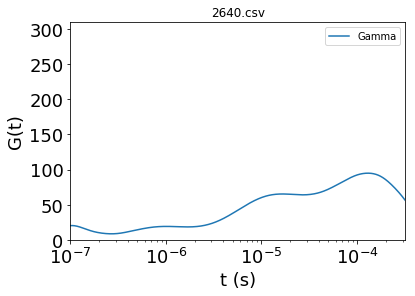

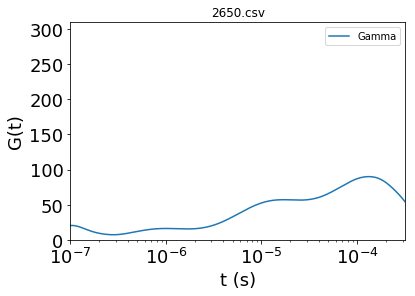

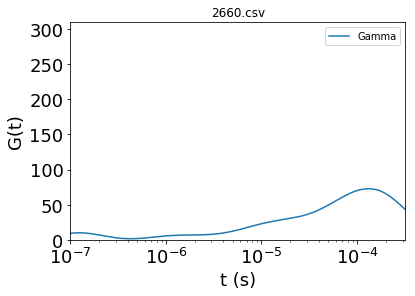

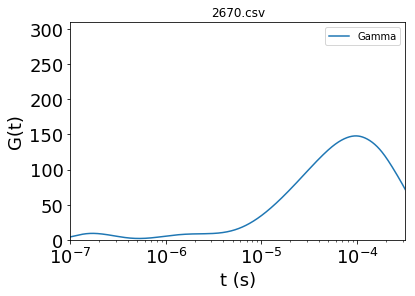

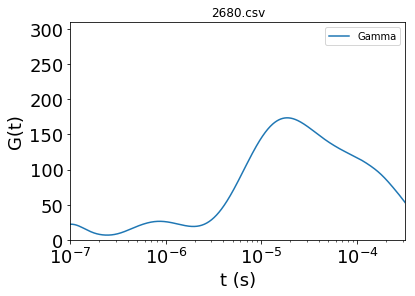

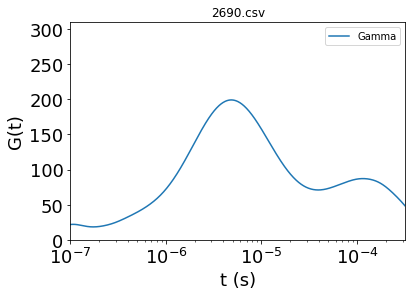

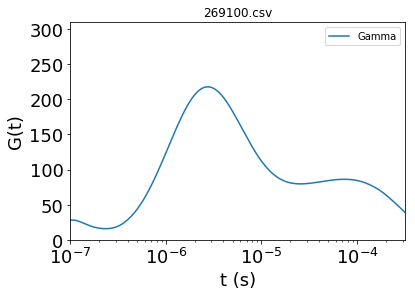

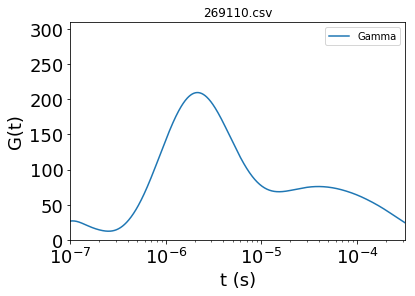

In [8]:
#_*_coding:utf-8_*_
# author: fukun
# 2019.4.4
'''（3）弛豫时间：读取一个文件夹所有文件。按弛豫时间画出DRT
'''
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline
fl = 3.1e3
fh = 1e7
taul = 1/fh
tauh = 1/fl

filepath='D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\26 60ns'
filenames = os.listdir(filepath)         # 读取全部文件名

#plt.figure()
for filename in filenames:
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    drt.plot(x='tau',y='Gamma',logx=True,  fontsize=18,ylim=[0,310],yticks=[0,50,100,150,200,250,300])
    plt.ylabel('G(t)',fontsize=18)
    plt.xlabel('t (s)',fontsize=18)
    plt.title(filename)


#plt.xlabel('tau')
plt.show()   

['13-20.csv', '1300.csv', '1311.csv', '1320.csv', '1330.csv', '1340.csv', '1350.csv', '1360.csv', '1370.csv', '1380.csv', '1390.csv', '139100.csv', '139110.csv']
         tau     Gamma
0   0.000003  231.6940
1   0.000136  221.6145
2   0.000134  178.1349
3   0.000139  157.7245
4   0.000148  132.7429
5   0.000158  133.8669
6   0.000158  134.0226
7   0.000139  130.9505
8   0.000014  197.6691
9   0.000003  202.5607
10  0.000003  220.8487
11  0.000003  218.0704
12  0.000002  209.7178


Text(0.5, 0, ' ')

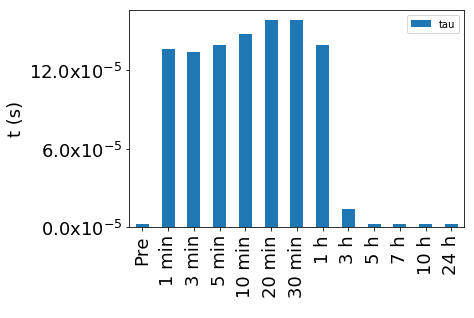

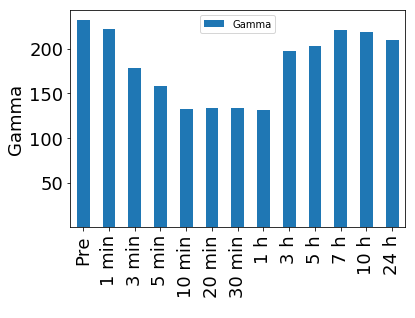

In [9]:
#_*_coding:utf-8_*_
# author: fukun
# 2019.4.4
'''（4）弛豫时间：读取一个文件夹所有文件。寻找DRT极值，按tau画出柱状图。
'''
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline
fl = 3.1e3
fh = 1e7
taul = 1/fh
tauh = 1/fl

filepath0 = 'D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\13_20tau.xlsx'
filepath= 'D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\13 20ns'
filenames = os.listdir(filepath)         # 读取全部文件名
#filenames.sort(key=lambda x:int(x[:-4])) # 排序
print(filenames)
I = len(filenames)
Max_Gamma = np.zeros(2*I).reshape(-1,2)
#plt.figure()
for i in range(I):
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    filename = filenames[i]
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    #drt['Frequency (Hz)']= drt['tau'].map(lambda x: 1/x)
    drt = drt.set_index('tau')
    Max_value = drt.max(axis=0)['Gamma'] # 寻找最大值，axis=0表示列
    Max_index = drt['Gamma'].idxmax()    # 寻找最大值对应的index
    Max_Gamma[i,0] = Max_index
    Max_Gamma[i,1] = Max_value
    

D = pd.DataFrame(Max_Gamma,columns=['tau','Gamma'])
print(D)
D['Conditions']=['Pre','1 min','3 min','5 min','10 min','20 min','30 min','1 h','3 h','5 h','7 h','10 h','24 h']
D = D.set_index('Conditions')
#D.to_excel(filepath0)  #将结果保存在excel文档中

ax = D.plot(y='tau',kind='bar', fontsize=18,yticks=[0,60e-6,12e-5])
plt.ylabel('t (s)',fontsize=18)
plt.xlabel(' ')
def formatnum(x, pos):
    return '$%.1f$x$10^{-5}$' % (x*1e5)
formatter = FuncFormatter(formatnum)
ax.yaxis.set_major_formatter(formatter)

D.plot(y='Gamma',kind='bar',fontsize=18, yticks=[50,100,150,200])
plt.ylabel('Gamma',fontsize=18)
plt.xlabel(' ')